In [4]:
import pandas as pd 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils import resample

In [5]:
df = pd.read_csv('hnc.csv') #19642; 31 , 1st is unique id 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 19642 non-null  int64  
 1   h1n1_worry                 19642 non-null  float64
 2   h1n1_awareness             19642 non-null  float64
 3   antiviral_medication       19642 non-null  float64
 4   contact_avoidance          19642 non-null  float64
 5   bought_face_mask           19642 non-null  float64
 6   wash_hands_frequently      19642 non-null  float64
 7   avoid_large_gatherings     19642 non-null  float64
 8   reduced_outside_home_cont  19642 non-null  float64
 9   avoid_touch_face           19642 non-null  float64
 10  dr_recc_h1n1_vacc          19642 non-null  float64
 11  dr_recc_seasonal_vacc      19642 non-null  float64
 12  chronic_medic_condition    19642 non-null  float64
 13  cont_child_undr_6_mnths    19642 non-null  flo

In [3]:
#_______________VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [6]:
#first put your predictors in x
x = df.iloc[:, [1,2,15,16,17,18,19,20,21,23,26]] # x is a data frame

In [7]:
# vif dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

In [8]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  

In [9]:
print(vif_data) # two columns, feature & VIF will appear

                   feature        VIF
0               h1n1_worry   5.760260
1           h1n1_awareness   6.614486
2   is_h1n1_vacc_effective  21.012104
3            is_h1n1_risky   7.199900
4      sick_from_h1n1_vacc   4.643447
5   is_seas_vacc_effective  20.713540
6            is_seas_risky   8.017016
7              age_bracket   5.486319
8            qualification  13.197759
9             income_level  16.193963
10              employment   7.636121


Drop vif>10 and ‘Unnamed: 0’

In [10]:
# drop VIF> 10
df = df.drop(['is_h1n1_vacc_effective', 'is_seas_vacc_effective',
               'qualification', 'employment'], axis = 1) 

In [11]:
df.info() # 19642, 27 [with 1st as Unnamed: 0, lets remove this]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 19642 non-null  int64  
 1   h1n1_worry                 19642 non-null  float64
 2   h1n1_awareness             19642 non-null  float64
 3   antiviral_medication       19642 non-null  float64
 4   contact_avoidance          19642 non-null  float64
 5   bought_face_mask           19642 non-null  float64
 6   wash_hands_frequently      19642 non-null  float64
 7   avoid_large_gatherings     19642 non-null  float64
 8   reduced_outside_home_cont  19642 non-null  float64
 9   avoid_touch_face           19642 non-null  float64
 10  dr_recc_h1n1_vacc          19642 non-null  float64
 11  dr_recc_seasonal_vacc      19642 non-null  float64
 12  chronic_medic_condition    19642 non-null  float64
 13  cont_child_undr_6_mnths    19642 non-null  flo

In [14]:
df = df.drop(['Unnamed: 0'], axis = 1)

KeyError: "['Unnamed: 0'] not found in axis"

In [15]:
df.info() # 19642, 26

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

In [16]:
df.to_csv('hnvif.csv')

In [17]:
# X and y
X = df.loc[:, df.columns != 'h1n1_vaccine']
y = df.loc[:, df.columns == 'h1n1_vaccine']

###  solver = liblinear
'''
liblinear [library for linear classification]: good for small data
newton-cg [newton conjugate]: can be used in this case
lbfgs[limited memory BFGS]: for multiclass problems
BFGS:Broyden–Fletcher–Goldfarb–Shanno algorithm 
sag [Stochastic Average Gradient Descent]: good for large data sets
saga: a little variant of sag

### Model

In [18]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(X, y)
model1.intercept_
model1.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-0.04496998,  0.23590128,  0.07987153, -0.02180858,  0.1113739 ,
         0.06406089, -0.18878698, -0.09165618,  0.02807511,  2.01296273,
        -0.55604782,  0.12997669,  0.23423516,  0.86015086,  0.45517096,
        -0.06153089,  0.21776949,  0.15981204,  0.20158744,  0.09882776,
        -0.12280441, -0.0128468 ,  0.13666195,  0.37645012,  0.35226739]])

In [20]:
model1.intercept_

array([-4.77885013])

In [21]:
model1.coef_

array([[-0.04496998,  0.23590128,  0.07987153, -0.02180858,  0.1113739 ,
         0.06406089, -0.18878698, -0.09165618,  0.02807511,  2.01296273,
        -0.55604782,  0.12997669,  0.23423516,  0.86015086,  0.45517096,
        -0.06153089,  0.21776949,  0.15981204,  0.20158744,  0.09882776,
        -0.12280441, -0.0128468 ,  0.13666195,  0.37645012,  0.35226739]])

In [22]:
#Predictions
y_pred = model1.predict(X)

In [23]:

#Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y, y_pred)
print(cm)

[[14200   928]
 [ 2608  1906]]


In [24]:
#Accuracy Score - correct predictions / total number of data points
model1.score(X,y) #.0.82
(14200+1906)/(14200+928+2608+1906) # 0.82


0.8199775990225028

### Calssification report

In [25]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     15128
           1       0.67      0.42      0.52      4514

    accuracy                           0.82     19642
   macro avg       0.76      0.68      0.70     19642
weighted avg       0.81      0.82      0.80     19642



In [26]:
#ROC Curve - Receiver Operating Characteristic curve
#tpr = True Positive Rate 
#fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred_prob = model1.predict_proba(X)
fpr, tpr, thresholds =roc_curve(df["h1n1_vaccine"], y_pred_prob[:,1])
roc_auc = auc(fpr, tpr) #Area under Curve 0.82
print(roc_auc)

0.8216597704608753


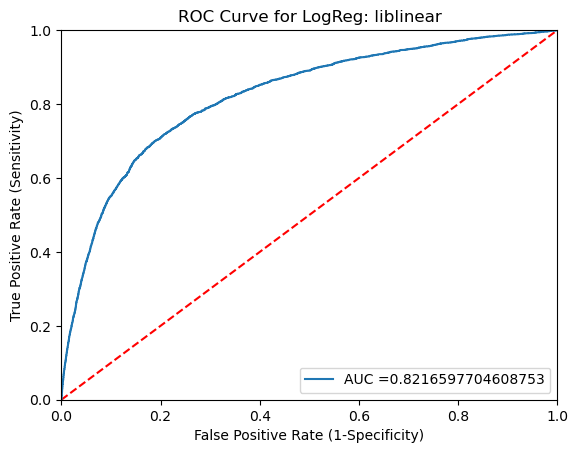

In [27]:
#ROC Curve
plt.title('ROC Curve for LogReg: liblinear')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()

### SMOTE

In [28]:
#____________________SMOTE 

novac = df[df.h1n1_vaccine == 0] #15128,26
vac = df[df.h1n1_vaccine == 1] #4514, 26

In [29]:
#__________________________________ oversample minority_with replacement
from sklearn.utils import resample
vac_oversample = resample(vac,
                          replace=True, # sample with replacement
                          n_samples=len(novac), # match number in majority class
                          random_state=27) # reproducible results


In [30]:
# combine majority and oversampled minority

dfsmote = pd.concat([novac, vac_oversample]) 
dfsmote.h1n1_vaccine.value_counts()

0    15128
1    15128
Name: h1n1_vaccine, dtype: int64

In [31]:

dfsmote.to_csv('hnsmote.csv')

In [32]:
#___________________lets re do log reg
# X and y
X2 = dfsmote.loc[:, dfsmote.columns != 'h1n1_vaccine']
y2 = dfsmote.loc[:, dfsmote.columns == 'h1n1_vaccine']
y2.value_counts() # both 15,128

h1n1_vaccine
0               15128
1               15128
dtype: int64

# solver = liblinear
'''
liblinear [library for linear classification]: good for small data
newton-cg [newton conjugate]: can be used in this case
lbfgs[limited memory BFGS]: for multiclass problems
BFGS:Broyden–Fletcher–Goldfarb–Shanno algorithm 
sag [Stochastic Average Gradient Descent]: good for large data sets
saga: a little variant of sag

In [33]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='liblinear', random_state=0)
model2.fit(X2, y2)
model2.intercept_
model2.coef_


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-0.01118147,  0.2210547 ,  0.1371775 , -0.00679728,  0.14257456,
         0.09421023, -0.2000553 , -0.11595893, -0.01936165,  2.10424967,
        -0.63670885,  0.14104786,  0.19295641,  0.93630368,  0.43867647,
        -0.05666603,  0.22833308,  0.1551444 ,  0.23000128,  0.10607717,
        -0.11945159,  0.07376133,  0.04801412,  0.2681097 ,  0.24540742]])

cO-effecients

In [36]:
model2.intercept_


array([-3.55103733])

In [37]:
model2.coef_


array([[-0.01118147,  0.2210547 ,  0.1371775 , -0.00679728,  0.14257456,
         0.09421023, -0.2000553 , -0.11595893, -0.01936165,  2.10424967,
        -0.63670885,  0.14104786,  0.19295641,  0.93630368,  0.43867647,
        -0.05666603,  0.22833308,  0.1551444 ,  0.23000128,  0.10607717,
        -0.11945159,  0.07376133,  0.04801412,  0.2681097 ,  0.24540742]])

In [34]:
#Predictions
y_pred2 = model2.predict(X2)

### With and without SMOTE

In [35]:
#Confusion matrix
from sklearn import metrics
cm2 = metrics.confusion_matrix(y2, y_pred2)
print(cm2)

[[11848  3280]
 [ 4154 10974]]



WITHOUT SMOTE = 
[[14200   928]
 [ 2608  1906]]

In [38]:
#Accuracy Score - correct predictions / total number of data points
model2.score(X2,y2) #WITH SMOTE = 0.75; without = #.0.82
(11848+10974)/(11848+3200+4154+10974) # 0.75

0.756296394485684

In [39]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y2, y_pred2))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     15128
           1       0.77      0.73      0.75     15128

    accuracy                           0.75     30256
   macro avg       0.76      0.75      0.75     30256
weighted avg       0.76      0.75      0.75     30256



## AUC

In [40]:
#ROC Curve - Receiver Operating Characteristic curve
#tpr = True Positive Rate 
#fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred_prob2 = model2.predict_proba(X2)
fpr2, tpr2, thresholds2 =roc_curve(dfsmote["h1n1_vaccine"], y_pred_prob2[:,1])
roc_auc2 = auc(fpr2, tpr2) #Area under Curve 0.82
print(roc_auc2) # 0.82, same as without smote


0.8202646708776102


## ROC

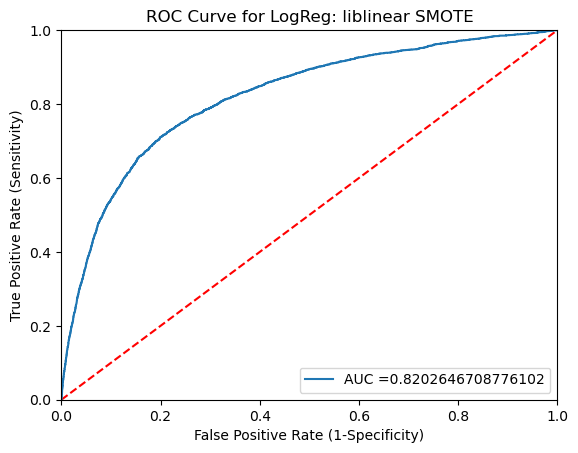

In [41]:
#ROC Curve
plt.title('ROC Curve for LogReg: liblinear SMOTE')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr2, tpr2, label = 'AUC =' +str(roc_auc2))
plt.legend(loc=4) #Location of label
plt.show()